Optimal B1 based on maximizing E[PNL from B1]: 200
Proportional Expected PNL at optimal B1: 4800.00


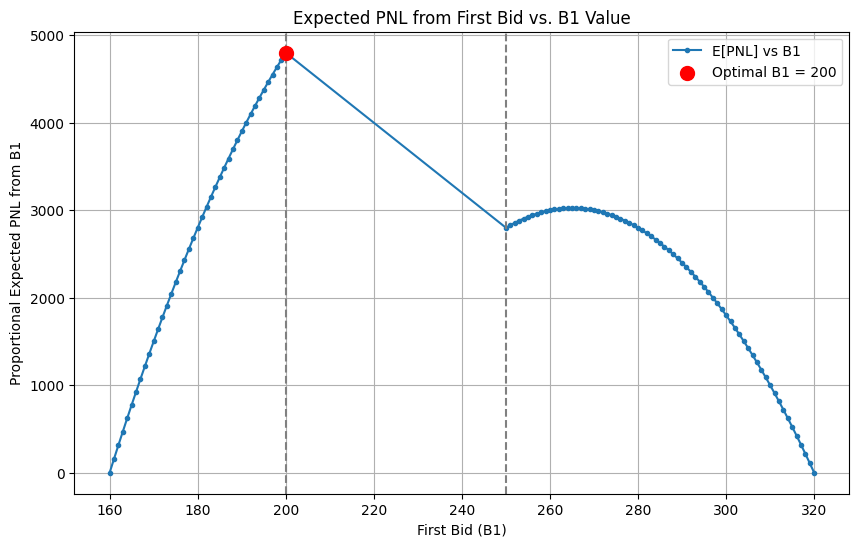


Analytical check confirms B1=200 maximizes the first bid's contribution.
PNL(B1=200) proportional value = 4800 = 4800
PNL(B1=265) proportional value = 3025 = 3025


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_expected_pnl_b1(b1, sell_price=320.0):
    """
    Calculates the expected PNL (proportional) for a given first bid (B1).
    Assumes a uniform distribution density over [160, 200] and [250, 320].
    The total length of these intervals is (200-160) + (320-250) = 40 + 70 = 110.
    We can ignore the constant density factor (1/110) when comparing relative PNL.

    Args:
        b1 (float): The first bid value.
        sell_price (float): The price flippers are sold for.

    Returns:
        float: The expected PNL (proportional to the actual expected PNL).
               Returns 0 if b1 is outside profitable ranges.
    """
    # Profit margin for any turtle bought at B1
    profit_margin = sell_price - b1

    if profit_margin <= 0:
      return 0 # No profit if bid is at or above sell price

    proportional_turtles_captured = 0.0

    # Case 1: B1 is within the first range [160, 200]
    if 160 <= b1 <= 200:
        # Captures turtles with RP in [160, b1)
        proportional_turtles_captured = max(0, b1 - 160) # Use max(0,...) for robustness
    # Case 2: B1 is within the second range [250, 320]
    elif 250 <= b1 <= sell_price: # Don't bid higher than sell price
        # Captures all turtles in [160, 200) AND turtles in [250, b1)
        length_first_range = 200 - 160
        length_second_range_captured = max(0, b1 - 250)
        proportional_turtles_captured = length_first_range + length_second_range_captured
    # Case 3: B1 is in the gap (200, 250) or below 160
    else:
        # If 200 < b1 < 250, it captures the same as b1=200, but at lower profit.
        # We are looking for the optimal bid, so these intermediate bids are suboptimal.
        # If b1 < 160, captures nothing.
        # We return 0 here, as the optimal won't be in these ranges.
        # A more precise calculation for 200 < b1 < 250 would be:
        # proportional_turtles_captured = 200 - 160 = 40
        # But the profit margin is lower than at b1=200, so 200 dominates.
        return 0

    # Expected PNL is proportional to (Number of turtles captured) * (Profit per turtle)
    expected_pnl = proportional_turtles_captured * profit_margin
    return expected_pnl

# --- Analysis ---
# Define the range of B1 values to check
# We check integers, but could use finer steps if needed.
b1_values_range1 = np.arange(160, 201, 1) # Range [160, 200]
b1_values_range2 = np.arange(250, 321, 1) # Range [250, 320]
b1_values = np.concatenate((b1_values_range1, b1_values_range2))

# Calculate expected PNL for each B1
pnl_values = [calculate_expected_pnl_b1(b1) for b1 in b1_values]

# Find the optimal B1
max_pnl = -1
optimal_b1 = -1
for b1, pnl in zip(b1_values, pnl_values):
    if pnl > max_pnl:
        max_pnl = pnl
        optimal_b1 = b1

print(f"Optimal B1 based on maximizing E[PNL from B1]: {optimal_b1}")
print(f"Proportional Expected PNL at optimal B1: {max_pnl:.2f}")

# --- Visualization (Optional) ---
plt.figure(figsize=(10, 6))
plt.plot(b1_values, pnl_values, marker='.', linestyle='-', label='E[PNL] vs B1')

# Highlight the maximum point
plt.scatter([optimal_b1], [max_pnl], color='red', s=100, zorder=5, label=f'Optimal B1 = {optimal_b1}')

plt.xlabel("First Bid (B1)")
plt.ylabel("Proportional Expected PNL from B1")
plt.title("Expected PNL from First Bid vs. B1 Value")
plt.grid(True)
plt.legend()
plt.axvline(200, color='gray', linestyle='--', label='Range Boundary (200)')
plt.axvline(250, color='gray', linestyle='--', label='Range Boundary (250)')
plt.show()

# --- Analytical Confirmation ---
# For B1 in [160, 200], PNL ~ (B1 - 160) * (320 - B1). Max at B1=200 (value 40*120=4800)
# For B1 in [250, 320], PNL ~ (B1 - 210) * (320 - B1). Max at B1=(210+320)/2=265 (value 55*55=3025)
# Comparing max values (4800 vs 3025), B1=200 gives higher expected PNL from the first bid alone.
print("\nAnalytical check confirms B1=200 maximizes the first bid's contribution.")
print(f"PNL(B1=200) proportional value = {(200-160)*(320-200)} = 4800")
print(f"PNL(B1=265) proportional value = {(265-210)*(320-265)} = 3025")



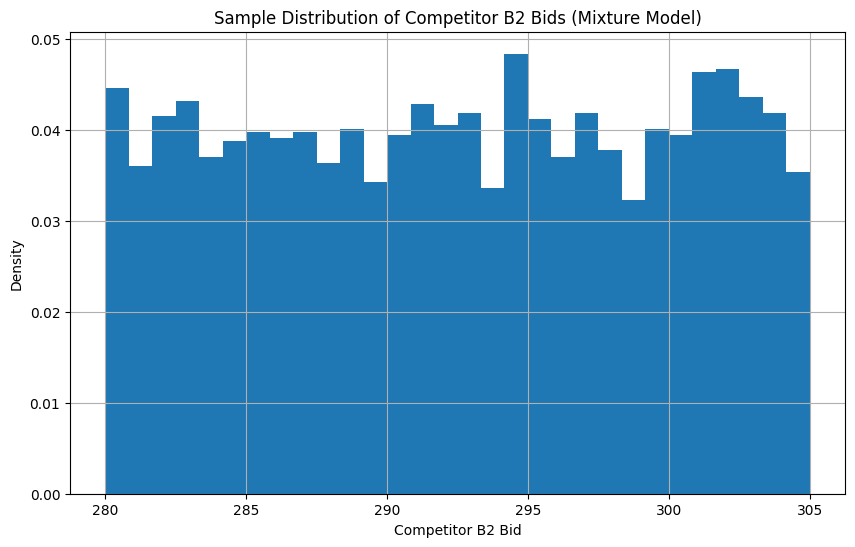


Running Monte Carlo Simulation for B2...
Parameters: B1=200.0, Turtles/Round=1000, Competitors=3500, Rounds=5000
  Tested B2 = 280, Average PNL = 47109.46
  Tested B2 = 281, Average PNL = 47418.09
  Tested B2 = 282, Average PNL = 47756.22
  Tested B2 = 283, Average PNL = 48121.14
  Tested B2 = 284, Average PNL = 48523.10
  Tested B2 = 285, Average PNL = 48973.65
  Tested B2 = 286, Average PNL = 49454.08
  Tested B2 = 287, Average PNL = 49990.14
  Tested B2 = 288, Average PNL = 50585.32
  Tested B2 = 289, Average PNL = 51247.27
  Tested B2 = 290, Average PNL = 51974.30


KeyboardInterrupt: 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import time

# --- Simulation Parameters ---
B1_FIXED = 200.0       # Optimal first bid determined previously
SELL_PRICE = 320.0
NUM_TURTLES = 1000    # Number of turtles visiting in each simulation round
NUM_COMPETITORS = 3500   # Number of other traders you are competing against
NUM_SIMULATIONS = 5000 # Number of rounds to average over for statistical stability

# Range of B2 values for your agent to test
YOUR_B2_OPTIONS = np.arange(280, 311, 1) # Test B2 from 280 to 310 in steps of 1


def generate_reserve_prices(num_turtles):
	"""Generates reserve prices according to the split uniform distribution."""
	rps = np.zeros(num_turtles)
	# Proportions: Range 1 is 40/110, Range 2 is 70/110
	num_range1 = int(num_turtles * 40 / 110)
	num_range2 = num_turtles - num_range1

	rps[:num_range1] = np.random.uniform(160, 200, num_range1)
	rps[num_range1:] = np.random.uniform(250, 320, num_range2)
	np.random.shuffle(rps) # Shuffle to mix them up
	return rps

def get_competitor_bids(num_competitors):
	"""Generates B2 bids for competitors based on the chosen strategy."""
	# Using Strategy 1: Uniform random
	return np.random.uniform(280, 305, num_competitors)
	# Using Strategy 2: Normal distribution
	# return np.clip(np.random.normal(290, 10, num_competitors), 275, 319)


def simulate_round(your_b2, b1_fixed, competitor_bids, reserve_prices):
	"""Simulates one round of bidding for YOUR agent."""
	your_pnl = 0.0
	num_turtles = len(reserve_prices)

	# Calculate the average B2 for this round
	all_b2_bids = np.append(competitor_bids, your_b2)
	avg_b2 = np.mean(all_b2_bids)

	# Calculate PNL from B1 (constant for fixed B1, but shown for clarity)
	turtles_accept_b1 = reserve_prices < b1_fixed
	# Filter turtles within valid RP range [160, 200) for B1
	valid_b1_turtles = turtles_accept_b1 & (reserve_prices >= 160)
	pnl_from_b1 = np.sum(valid_b1_turtles) * (SELL_PRICE - b1_fixed)
	your_pnl += pnl_from_b1

	# Calculate PNL from B2
	# Turtles potentially accepting B2: B1 <= RP < Your_B2
	turtles_consider_b2 = (reserve_prices >= b1_fixed) & (reserve_prices < your_b2)

	# Filter turtles within valid RP range [250, 320) for B2 (as B1=200 covers first range)
	valid_b2_turtles_rp = reserve_prices[turtles_consider_b2 & (reserve_prices >= 250)]

	num_b2_accepted = len(valid_b2_turtles_rp)

	if num_b2_accepted > 0:
		profit_margin_b2 = SELL_PRICE - your_b2

		if profit_margin_b2 <= 0: # No profit if B2 is at or above sell price
			pnl_from_b2 = 0
		elif your_b2 >= avg_b2:
			# Standard profit, no penalty
			pnl_from_b2 = num_b2_accepted * profit_margin_b2
		else:
			# Apply penalty factor p = ((320 - AvgB2) / (320 - B2))^3
			# Calculate scaled profit directly: margin * p = (320 - AvgB2)^3 / (320 - B2)^2
			# Handle potential division by zero if your_b2 is very close to 320
			denominator = (SELL_PRICE - your_b2)**2
			if denominator < 1e-9: # Avoid division by zero or instability
				scaled_profit_per_turtle = 0
			else:
				numerator = (SELL_PRICE - avg_b2)**3
				# Ensure numerator isn't negative if avg_b2 > 320 (unlikely but possible)
				numerator = max(0, numerator)
				scaled_profit_per_turtle = numerator / denominator

			pnl_from_b2 = num_b2_accepted * scaled_profit_per_turtle

		your_pnl += pnl_from_b2

	return your_pnl

# --- Optional: Plot histogram of competitor bids from one sample ---
sample_competitor_bids = get_competitor_bids(NUM_COMPETITORS)
plt.figure(figsize=(10, 6))
plt.hist(sample_competitor_bids, bins=30, density=True)
plt.title("Sample Distribution of Competitor B2 Bids (Mixture Model)")
plt.xlabel("Competitor B2 Bid")
plt.ylabel("Density")
plt.grid(True)
plt.show()

# --- Main Simulation Loop ---
average_pnl_results = {}
start_time = time.time()

print(f"\nRunning Monte Carlo Simulation for B2...")
print(f"Parameters: B1={B1_FIXED}, Turtles/Round={NUM_TURTLES}, Competitors={NUM_COMPETITORS}, Rounds={NUM_SIMULATIONS}")

for b2_option in YOUR_B2_OPTIONS:
	total_pnl_for_option = 0
	for i in range(NUM_SIMULATIONS):
		# Generate data for this round
		reserve_prices = generate_reserve_prices(NUM_TURTLES)
		competitor_bids = get_competitor_bids(NUM_COMPETITORS)

		# Simulate the round for the current B2 option
		round_pnl = simulate_round(b2_option, B1_FIXED, competitor_bids, reserve_prices)
		total_pnl_for_option += round_pnl

		# Progress indicator
		# if (i + 1) % (NUM_SIMULATIONS // 10) == 0:
		#     print(f"  B2={b2_option}, Progress: {(i+1)/NUM_SIMULATIONS*100:.0f}%")


	average_pnl = total_pnl_for_option / NUM_SIMULATIONS
	average_pnl_results[b2_option] = average_pnl
	print(f"  Tested B2 = {b2_option}, Average PNL = {average_pnl:.2f}")


end_time = time.time()
print(f"Simulation finished in {end_time - start_time:.2f} seconds.")

# --- Find and Print Best B2 ---
best_b2 = -1
max_avg_pnl = -float('inf')
for b2, avg_pnl in average_pnl_results.items():
	if avg_pnl > max_avg_pnl:
		max_avg_pnl = avg_pnl
		best_b2 = b2

print(f"\n--- Results ---")
print(f"Optimal B2 found via simulation: {best_b2}")
print(f"Maximum Average PNL achieved: {max_avg_pnl:.2f}")

# --- Visualization ---
b2_vals = list(average_pnl_results.keys())
pnl_vals = list(average_pnl_results.values())

plt.figure(figsize=(12, 7))
plt.plot(b2_vals, pnl_vals, marker='o', linestyle='-')
plt.scatter([best_b2], [max_avg_pnl], color='red', s=150, zorder=5, label=f'Optimal B2 = {best_b2}')
plt.xlabel("Your Second Bid (B2)")
plt.ylabel("Average Total PNL per Round")
plt.title(f"Monte Carlo Simulation Results for B2 (B1={B1_FIXED}, Competitors={NUM_COMPETITORS})")
plt.grid(True)
plt.legend()
plt.show()



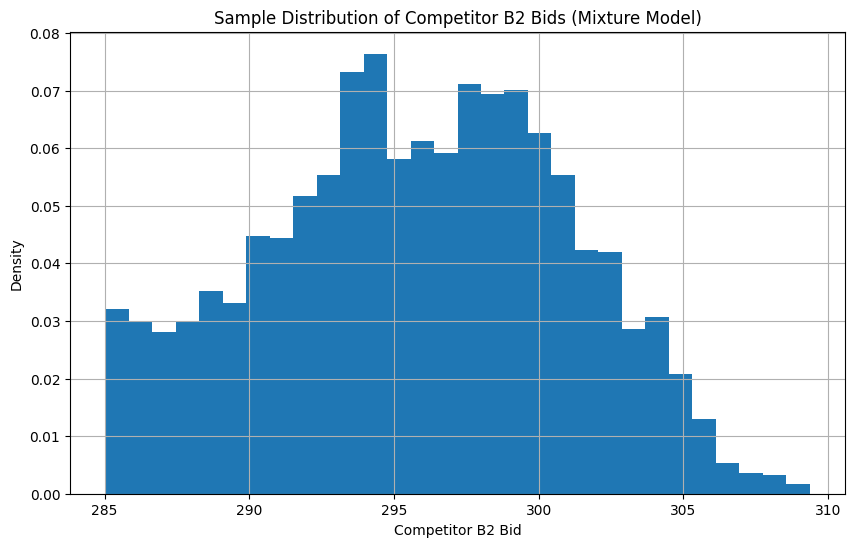


Running Monte Carlo Simulation for B2...
Parameters: B1=200.0, Turtles/Round=1000, Competitors=3499, Rounds=1000
Competitor B2 Strategy: Mixture Model
  - 71.4% Good: TruncNorm(mean=298, std=4, low=285, upp=310)
  - 28.6% Okay/Naive: Uniform(285, 295)
  Tested B2 = 285, Average PNL = 47295.30, Mean Observed AvgB2 = 295.70
  Tested B2 = 286, Average PNL = 47625.66, Mean Observed AvgB2 = 295.70
  Tested B2 = 287, Average PNL = 47998.31, Mean Observed AvgB2 = 295.71
  Tested B2 = 288, Average PNL = 48401.02, Mean Observed AvgB2 = 295.70
  Tested B2 = 289, Average PNL = 48843.61, Mean Observed AvgB2 = 295.71
  Tested B2 = 290, Average PNL = 49351.45, Mean Observed AvgB2 = 295.70
  Tested B2 = 291, Average PNL = 49935.79, Mean Observed AvgB2 = 295.70
  Tested B2 = 292, Average PNL = 50536.61, Mean Observed AvgB2 = 295.70
  Tested B2 = 293, Average PNL = 51266.89, Mean Observed AvgB2 = 295.70
  Tested B2 = 294, Average PNL = 52061.59, Mean Observed AvgB2 = 295.70
  Tested B2 = 295, Average 

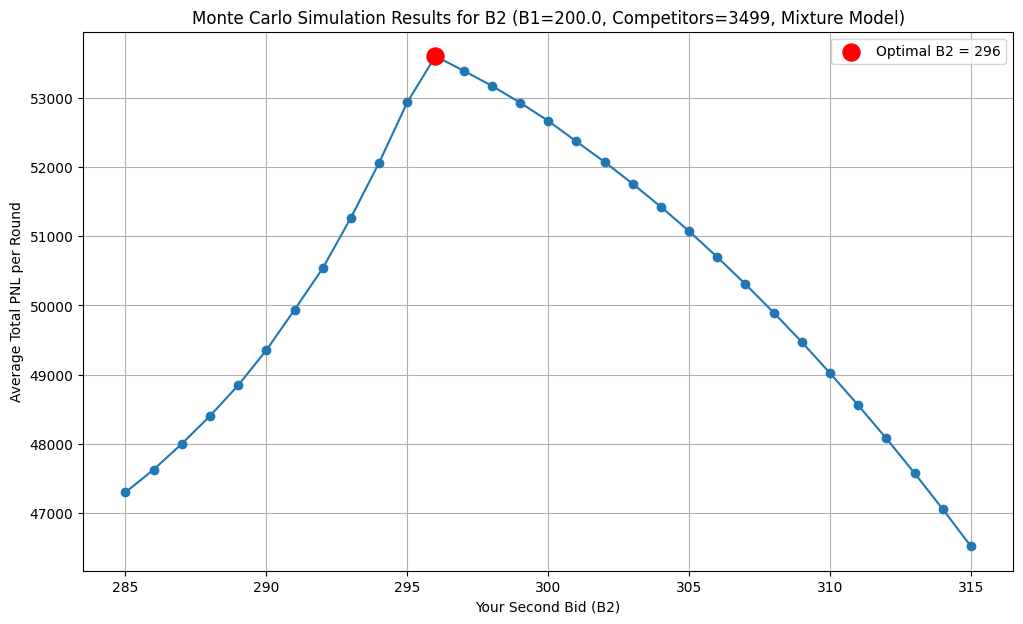

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import time
# highlight-start
from scipy.stats import truncnorm # Needed for truncated normal distribution
# highlight-end

# --- Simulation Parameters ---
B1_FIXED = 200.0       # Optimal first bid determined previously
SELL_PRICE = 320.0
NUM_TURTLES = 1000    # Number of turtles visiting in each simulation round
NUM_COMPETITORS = 3499 # Total teams - 1 (adjust if needed based on ~3.5k teams)
NUM_SIMULATIONS = 1000 # Reduced for potentially slower simulation, increase if needed

# Range of B2 values for your agent to test
YOUR_B2_OPTIONS = np.arange(285, 316, 1) # Test B2 from 285 to 315 in steps of 1

# --- Competitor Strategy ---
# Mixture Model based on user assumptions (~3500 teams total)
# highlight-start
PROPORTION_GOOD = 2500 / 3500  # ~71%
# PROPORTION_OKAY = 1000 / 3500 # ~29% (Implicitly 1 - PROPORTION_GOOD)

# Parameters for "Good" teams (Truncated Normal)
GOOD_MEAN = 298
GOOD_STD = 4
GOOD_LOWER_BOUND = 285
GOOD_UPPER_BOUND = 310

# Parameters for "Okay/Naive" teams (Uniform)
OKAY_MIN_BID = 285
OKAY_MAX_BID = 295
# highlight-end

def generate_reserve_prices(num_turtles):
	"""Generates reserve prices according to the split uniform distribution."""
	rps = np.zeros(num_turtles)
	# Proportions: Range 1 is 40/110, Range 2 is 70/110
	num_range1 = int(num_turtles * 40 / 110)
	num_range2 = num_turtles - num_range1

	rps[:num_range1] = np.random.uniform(160, 200, num_range1)
	rps[num_range1:] = np.random.uniform(250, 320, num_range2)
	np.random.shuffle(rps) # Shuffle to mix them up
	return rps

# highlight-start
def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
	"""Helper function for sampling from scipy's truncnorm."""
	return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

def get_competitor_bids(num_competitors):
	"""
    Generates B2 bids for competitors based on the Mixture Model strategy.
    """
	bids = np.zeros(num_competitors)
	# Determine how many competitors fall into each category
	is_good_competitor = np.random.rand(num_competitors) < PROPORTION_GOOD
	num_good = np.sum(is_good_competitor)
	num_okay = num_competitors - num_good

	# Generate bids for "Good" competitors
	if num_good > 0:
		good_dist = get_truncated_normal(mean=GOOD_MEAN, sd=GOOD_STD, low=GOOD_LOWER_BOUND, upp=GOOD_UPPER_BOUND)
		bids[is_good_competitor] = good_dist.rvs(num_good)

	# Generate bids for "Okay/Naive" competitors
	if num_okay > 0:
		bids[~is_good_competitor] = np.random.uniform(OKAY_MIN_BID, OKAY_MAX_BID, num_okay)

	# Clip bids just in case to ensure they are within reasonable bounds (optional safety)
	# bids = np.clip(bids, 250, SELL_PRICE - 1e-6) # Ensure bids are > 250 and < 320

	return bids
# highlight-end

def simulate_round(your_b2, b1_fixed, competitor_bids, reserve_prices):
	"""Simulates one round of bidding for YOUR agent."""
	your_pnl = 0.0
	num_turtles = len(reserve_prices)

	# Calculate the average B2 for this round
	# Ensure competitor_bids is treated as an array
	competitor_bids = np.array(competitor_bids)
	all_b2_bids = np.append(competitor_bids, your_b2)
	avg_b2 = np.mean(all_b2_bids)


	# Calculate PNL from B1 (constant for fixed B1, but shown for clarity)
	turtles_accept_b1 = reserve_prices < b1_fixed
	# Filter turtles within valid RP range [160, 200) for B1
	valid_b1_turtles = turtles_accept_b1 & (reserve_prices >= 160)
	pnl_from_b1 = np.sum(valid_b1_turtles) * (SELL_PRICE - b1_fixed)
	your_pnl += pnl_from_b1

	# Calculate PNL from B2
	# Turtles potentially accepting B2: B1 <= RP < Your_B2
	turtles_consider_b2 = (reserve_prices >= b1_fixed) & (reserve_prices < your_b2)

	# Filter turtles within valid RP range [250, 320) for B2 (as B1=200 covers first range)
	valid_b2_turtles_rp = reserve_prices[turtles_consider_b2 & (reserve_prices >= 250)]

	num_b2_accepted = len(valid_b2_turtles_rp)

	if num_b2_accepted > 0:
		profit_margin_b2 = SELL_PRICE - your_b2

		if profit_margin_b2 <= 0: # No profit if B2 is at or above sell price
			pnl_from_b2 = 0
		elif your_b2 >= avg_b2:
			# Standard profit, no penalty
			pnl_from_b2 = num_b2_accepted * profit_margin_b2
		else:
			# Apply penalty factor p = ((320 - AvgB2) / (320 - B2))^3
			# Calculate scaled profit directly: margin * p = (320 - AvgB2)^3 / (320 - B2)^2
			# Handle potential division by zero if your_b2 is very close to 320
			denominator = (SELL_PRICE - your_b2)**2
			if denominator < 1e-9: # Avoid division by zero or instability
				scaled_profit_per_turtle = 0
			else:
				# Ensure avg_b2 doesn't exceed sell price for calculation stability
				safe_avg_b2 = min(avg_b2, SELL_PRICE - 1e-9)
				numerator = (SELL_PRICE - safe_avg_b2)**3
				# Ensure numerator isn't negative if avg_b2 > 320 (unlikely but possible)
				# numerator = max(0, numerator) # Already handled by safe_avg_b2
				scaled_profit_per_turtle = numerator / denominator

			pnl_from_b2 = num_b2_accepted * scaled_profit_per_turtle

		your_pnl += pnl_from_b2

	return your_pnl

# --- Optional: Plot histogram of competitor bids from one sample ---
sample_competitor_bids = get_competitor_bids(NUM_COMPETITORS)
plt.figure(figsize=(10, 6))
plt.hist(sample_competitor_bids, bins=30, density=True)
plt.title("Sample Distribution of Competitor B2 Bids (Mixture Model)")
plt.xlabel("Competitor B2 Bid")
plt.ylabel("Density")
plt.grid(True)
plt.show()
# --- Main Simulation Loop ---
average_pnl_results = {}
start_time = time.time()

print(f"\nRunning Monte Carlo Simulation for B2...")
print(f"Parameters: B1={B1_FIXED}, Turtles/Round={NUM_TURTLES}, Competitors={NUM_COMPETITORS}, Rounds={NUM_SIMULATIONS}")
# highlight-start
print(f"Competitor B2 Strategy: Mixture Model")
print(f"  - {PROPORTION_GOOD*100:.1f}% Good: TruncNorm(mean={GOOD_MEAN}, std={GOOD_STD}, low={GOOD_LOWER_BOUND}, upp={GOOD_UPPER_BOUND})")
print(f"  - {(1-PROPORTION_GOOD)*100:.1f}% Okay/Naive: Uniform({OKAY_MIN_BID}, {OKAY_MAX_BID})")
# highlight-end


for b2_option in YOUR_B2_OPTIONS:
	total_pnl_for_option = 0
	# Add storage for average B2 observed when testing this option
	avg_b2_observed = []
	for i in range(NUM_SIMULATIONS):
		# Generate data for this round
		reserve_prices = generate_reserve_prices(NUM_TURTLES)
		competitor_bids = get_competitor_bids(NUM_COMPETITORS)

		# --- Store AvgB2 for analysis ---
		all_b2_bids_for_avg = np.append(competitor_bids, b2_option)
		avg_b2_observed.append(np.mean(all_b2_bids_for_avg))
		# --- End Store AvgB2 ---

		# Simulate the round for the current B2 option
		round_pnl = simulate_round(b2_option, B1_FIXED, competitor_bids, reserve_prices)
		total_pnl_for_option += round_pnl

		# Progress indicator
		# if (i + 1) % (NUM_SIMULATIONS // 10) == 0:
		#     print(f"  B2={b2_option}, Progress: {(i+1)/NUM_SIMULATIONS*100:.0f}%")


	average_pnl = total_pnl_for_option / NUM_SIMULATIONS
	average_pnl_results[b2_option] = average_pnl
	# Calculate the average of the AvgB2 values observed when testing this b2_option
	mean_observed_avg_b2 = np.mean(avg_b2_observed)
	print(f"  Tested B2 = {b2_option}, Average PNL = {average_pnl:.2f}, Mean Observed AvgB2 = {mean_observed_avg_b2:.2f}")




end_time = time.time()
print(f"Simulation finished in {end_time - start_time:.2f} seconds.")

# --- Find and Print Best B2 ---
best_b2 = -1
max_avg_pnl = -float('inf')
for b2, avg_pnl in average_pnl_results.items():
	if avg_pnl > max_avg_pnl:
		max_avg_pnl = avg_pnl
		best_b2 = b2

print(f"\n--- Results ---")
print(f"Optimal B2 found via simulation: {best_b2}")
print(f"Maximum Average PNL achieved: {max_avg_pnl:.2f}")

# --- Visualization ---
b2_vals = list(average_pnl_results.keys())
pnl_vals = list(average_pnl_results.values())

plt.figure(figsize=(12, 7))
plt.plot(b2_vals, pnl_vals, marker='o', linestyle='-')
plt.scatter([best_b2], [max_avg_pnl], color='red', s=150, zorder=5, label=f'Optimal B2 = {best_b2}')
plt.xlabel("Your Second Bid (B2)")
plt.ylabel("Average Total PNL per Round")
plt.title(f"Monte Carlo Simulation Results for B2 (B1={B1_FIXED}, Competitors={NUM_COMPETITORS}, Mixture Model)")
plt.grid(True)
plt.legend()
plt.show()


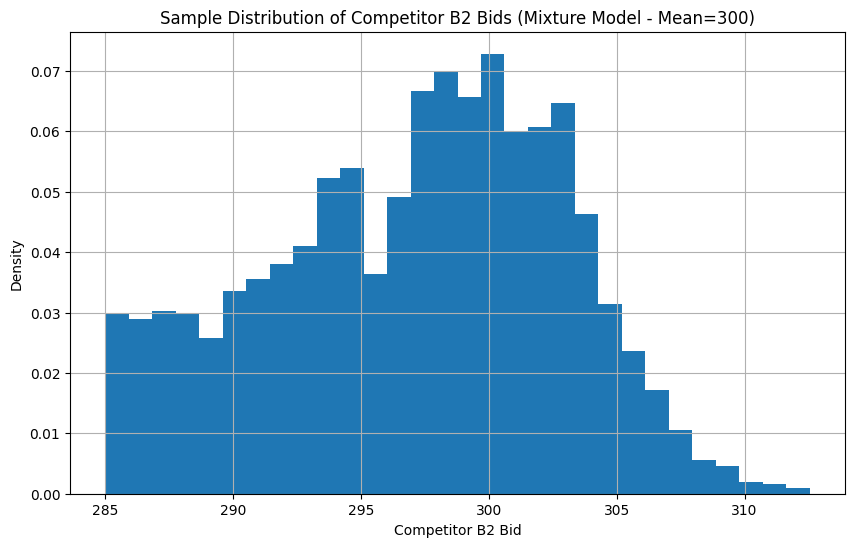


Running Monte Carlo Simulation for B2...
Parameters: B1=200.0, Turtles/Round=1000, Competitors=3499, Rounds=1000
Competitor B2 Strategy: Mixture Model
  - 71.4% Good: TruncNorm(mean=300, std=4, low=285, upp=315)
  - 28.6% Okay/Naive: Uniform(285, 295)
  Tested B2 = 285, Average PNL = 46670.74, Mean Observed AvgB2 = 297.14
  Tested B2 = 286, Average PNL = 46950.21, Mean Observed AvgB2 = 297.14
  Tested B2 = 287, Average PNL = 47251.89, Mean Observed AvgB2 = 297.14
  Tested B2 = 288, Average PNL = 47608.38, Mean Observed AvgB2 = 297.14
  Tested B2 = 289, Average PNL = 47983.74, Mean Observed AvgB2 = 297.14
  Tested B2 = 290, Average PNL = 48389.18, Mean Observed AvgB2 = 297.14
  Tested B2 = 291, Average PNL = 48852.97, Mean Observed AvgB2 = 297.14
  Tested B2 = 292, Average PNL = 49385.85, Mean Observed AvgB2 = 297.15
  Tested B2 = 293, Average PNL = 49970.47, Mean Observed AvgB2 = 297.14
  Tested B2 = 294, Average PNL = 50636.32, Mean Observed AvgB2 = 297.14
  Tested B2 = 295, Average 

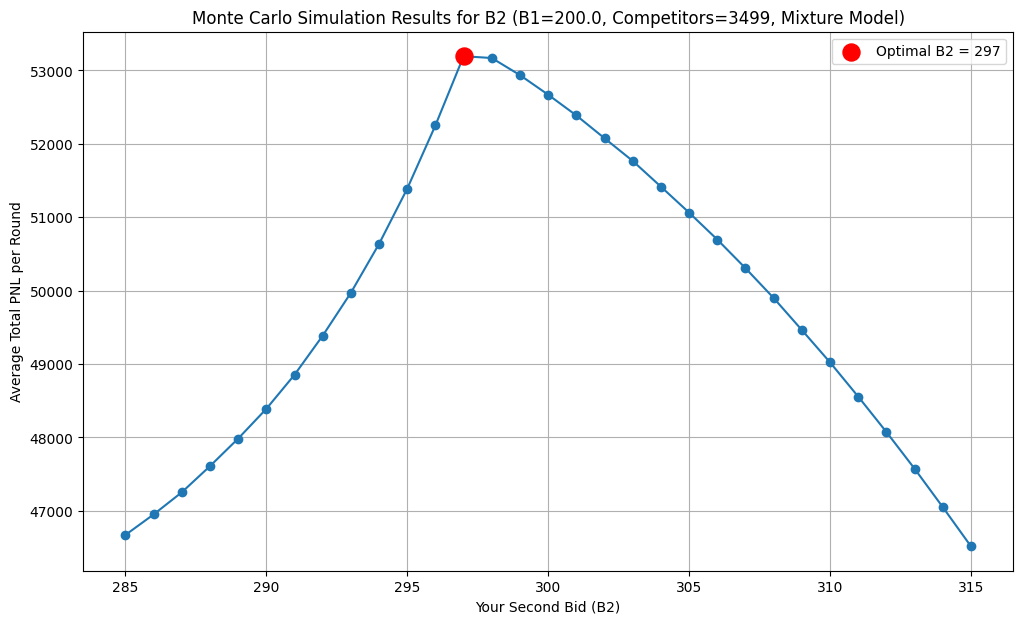

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import time
# highlight-start
from scipy.stats import truncnorm # Needed for truncated normal distribution
# highlight-end

# --- Simulation Parameters ---
B1_FIXED = 200.0       # Optimal first bid determined previously
SELL_PRICE = 320.0
NUM_TURTLES = 1000    # Number of turtles visiting in each simulation round
NUM_COMPETITORS = 3499 # Total teams - 1 (adjust if needed based on ~3.5k teams)
NUM_SIMULATIONS = 1000 # Reduced for potentially slower simulation, increase if needed

# Range of B2 values for your agent to test
YOUR_B2_OPTIONS = np.arange(285, 316, 1) # Test B2 from 285 to 315 in steps of 1

# --- Competitor Strategy ---
# Mixture Model based on user assumptions (~3500 teams total)
PROPORTION_GOOD = 2500 / 3500  # ~71%
# PROPORTION_OKAY = 1000 / 3500 # ~29% (Implicitly 1 - PROPORTION_GOOD)

# Parameters for "Good" teams (Truncated Normal)
# highlight-start
GOOD_MEAN = 300 # Increased mean to reflect more bids >= 300
# highlight-end
GOOD_STD = 4
GOOD_LOWER_BOUND = 285
GOOD_UPPER_BOUND = 315

# Parameters for "Okay/Naive" teams (Uniform)
OKAY_MIN_BID = 285
OKAY_MAX_BID = 295


def generate_reserve_prices(num_turtles):
	"""Generates reserve prices according to the split uniform distribution."""
	rps = np.zeros(num_turtles)
	# Proportions: Range 1 is 40/110, Range 2 is 70/110
	num_range1 = int(num_turtles * 40 / 110)
	num_range2 = num_turtles - num_range1

	rps[:num_range1] = np.random.uniform(160, 200, num_range1)
	rps[num_range1:] = np.random.uniform(250, 320, num_range2)
	np.random.shuffle(rps) # Shuffle to mix them up
	return rps


def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
	"""Helper function for sampling from scipy's truncnorm."""
	return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

def get_competitor_bids(num_competitors):
	"""
    Generates B2 bids for competitors based on the Mixture Model strategy.
    """
	bids = np.zeros(num_competitors)
	# Determine how many competitors fall into each category
	is_good_competitor = np.random.rand(num_competitors) < PROPORTION_GOOD
	num_good = np.sum(is_good_competitor)
	num_okay = num_competitors - num_good

	# Generate bids for "Good" competitors
	if num_good > 0:
		good_dist = get_truncated_normal(mean=GOOD_MEAN, sd=GOOD_STD, low=GOOD_LOWER_BOUND, upp=GOOD_UPPER_BOUND)
		bids[is_good_competitor] = good_dist.rvs(num_good)

	# Generate bids for "Okay/Naive" competitors
	if num_okay > 0:
		bids[~is_good_competitor] = np.random.uniform(OKAY_MIN_BID, OKAY_MAX_BID, num_okay)

	# Clip bids just in case to ensure they are within reasonable bounds (optional safety)
	# bids = np.clip(bids, 250, SELL_PRICE - 1e-6) # Ensure bids are > 250 and < 320

	return bids


def simulate_round(your_b2, b1_fixed, competitor_bids, reserve_prices):
	"""Simulates one round of bidding for YOUR agent."""
	your_pnl = 0.0
	num_turtles = len(reserve_prices)

	# Calculate the average B2 for this round
	# Ensure competitor_bids is treated as an array
	competitor_bids = np.array(competitor_bids)
	all_b2_bids = np.append(competitor_bids, your_b2)
	avg_b2 = np.mean(all_b2_bids)


	# Calculate PNL from B1 (constant for fixed B1, but shown for clarity)
	turtles_accept_b1 = reserve_prices < b1_fixed
	# Filter turtles within valid RP range [160, 200) for B1
	valid_b1_turtles = turtles_accept_b1 & (reserve_prices >= 160)
	pnl_from_b1 = np.sum(valid_b1_turtles) * (SELL_PRICE - b1_fixed)
	your_pnl += pnl_from_b1

	# Calculate PNL from B2
	# Turtles potentially accepting B2: B1 <= RP < Your_B2
	turtles_consider_b2 = (reserve_prices >= b1_fixed) & (reserve_prices < your_b2)

	# Filter turtles within valid RP range [250, 320) for B2 (as B1=200 covers first range)
	valid_b2_turtles_rp = reserve_prices[turtles_consider_b2 & (reserve_prices >= 250)]

	num_b2_accepted = len(valid_b2_turtles_rp)

	if num_b2_accepted > 0:
		profit_margin_b2 = SELL_PRICE - your_b2

		if profit_margin_b2 <= 0: # No profit if B2 is at or above sell price
			pnl_from_b2 = 0
		elif your_b2 >= avg_b2:
			# Standard profit, no penalty
			pnl_from_b2 = num_b2_accepted * profit_margin_b2
		else:
			# Apply penalty factor p = ((320 - AvgB2) / (320 - B2))^3
			# Calculate scaled profit directly: margin * p = (320 - AvgB2)^3 / (320 - B2)^2
			# Handle potential division by zero if your_b2 is very close to 320
			denominator = (SELL_PRICE - your_b2)**2
			if denominator < 1e-9: # Avoid division by zero or instability
				scaled_profit_per_turtle = 0
			else:
				# Ensure avg_b2 doesn't exceed sell price for calculation stability
				safe_avg_b2 = min(avg_b2, SELL_PRICE - 1e-9)
				numerator = (SELL_PRICE - safe_avg_b2)**3
				# Ensure numerator isn't negative if avg_b2 > 320 (unlikely but possible)
				# numerator = max(0, numerator) # Already handled by safe_avg_b2
				scaled_profit_per_turtle = numerator / denominator

			pnl_from_b2 = num_b2_accepted * scaled_profit_per_turtle

		your_pnl += pnl_from_b2

	return your_pnl


# --- Optional: Plot histogram of competitor bids from one sample ---
sample_competitor_bids = get_competitor_bids(NUM_COMPETITORS)
plt.figure(figsize=(10, 6))
plt.hist(sample_competitor_bids, bins=30, density=True)
plt.title("Sample Distribution of Competitor B2 Bids (Mixture Model - Mean=300)") # Updated title
plt.xlabel("Competitor B2 Bid")
plt.ylabel("Density")
plt.grid(True)
plt.show()
# --- Main Simulation Loop ---
average_pnl_results = {}
start_time = time.time()

print(f"\nRunning Monte Carlo Simulation for B2...")
print(f"Parameters: B1={B1_FIXED}, Turtles/Round={NUM_TURTLES}, Competitors={NUM_COMPETITORS}, Rounds={NUM_SIMULATIONS}")
# highlight-start
print(f"Competitor B2 Strategy: Mixture Model")
print(f"  - {PROPORTION_GOOD*100:.1f}% Good: TruncNorm(mean={GOOD_MEAN}, std={GOOD_STD}, low={GOOD_LOWER_BOUND}, upp={GOOD_UPPER_BOUND})") # Updated Mean shown
print(f"  - {(1-PROPORTION_GOOD)*100:.1f}% Okay/Naive: Uniform({OKAY_MIN_BID}, {OKAY_MAX_BID})")
# highlight-end


for b2_option in YOUR_B2_OPTIONS:
	total_pnl_for_option = 0
	# Add storage for average B2 observed when testing this option
	avg_b2_observed = []
	for i in range(NUM_SIMULATIONS):
		# Generate data for this round
		reserve_prices = generate_reserve_prices(NUM_TURTLES)
		competitor_bids = get_competitor_bids(NUM_COMPETITORS)

		# --- Store AvgB2 for analysis ---
		all_b2_bids_for_avg = np.append(competitor_bids, b2_option)
		avg_b2_observed.append(np.mean(all_b2_bids_for_avg))
		# --- End Store AvgB2 ---

		# Simulate the round for the current B2 option
		round_pnl = simulate_round(b2_option, B1_FIXED, competitor_bids, reserve_prices)
		total_pnl_for_option += round_pnl

		# Progress indicator
		# if (i + 1) % (NUM_SIMULATIONS // 10) == 0:
		#     print(f"  B2={b2_option}, Progress: {(i+1)/NUM_SIMULATIONS*100:.0f}%")


	average_pnl = total_pnl_for_option / NUM_SIMULATIONS
	average_pnl_results[b2_option] = average_pnl
	# Calculate the average of the AvgB2 values observed when testing this b2_option
	mean_observed_avg_b2 = np.mean(avg_b2_observed)
	print(f"  Tested B2 = {b2_option}, Average PNL = {average_pnl:.2f}, Mean Observed AvgB2 = {mean_observed_avg_b2:.2f}")


end_time = time.time()
print(f"Simulation finished in {end_time - start_time:.2f} seconds.")

# --- Find and Print Best B2 ---
best_b2 = -1
max_avg_pnl = -float('inf')
for b2, avg_pnl in average_pnl_results.items():
	if avg_pnl > max_avg_pnl:
		max_avg_pnl = avg_pnl
		best_b2 = b2

print(f"\n--- Results ---")
print(f"Optimal B2 found via simulation: {best_b2}")
print(f"Maximum Average PNL achieved: {max_avg_pnl:.2f}")

# --- Visualization ---
b2_vals = list(average_pnl_results.keys())
pnl_vals = list(average_pnl_results.values())

plt.figure(figsize=(12, 7))
plt.plot(b2_vals, pnl_vals, marker='o', linestyle='-')
plt.scatter([best_b2], [max_avg_pnl], color='red', s=150, zorder=5, label=f'Optimal B2 = {best_b2}')
plt.xlabel("Your Second Bid (B2)")
plt.ylabel("Average Total PNL per Round")
plt.title(f"Monte Carlo Simulation Results for B2 (B1={B1_FIXED}, Competitors={NUM_COMPETITORS}, Mixture Model)")
plt.grid(True)
plt.legend()
plt.show()
